## Codio Activity 6.1: Applying Singular Value Decomposition (SVD)

**Expected Time: 60 Minutes**

**Total Points: 20 Points**

This assignment targets the use of singular value decomposition (SVD). As demonstrated in the video lectures, you will use `scipy.linalg` to perform the SVD. However, rather than the Boston dataset, you will use image data to explore the information contained in the singular values of $\Sigma$. The data come from another built-in dataset in sklearn called the `olivetti_faces`. Each image in the dataset is a 64 pixel by 64 pixel photo of a person’s face.

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)

In [1]:
import numpy as np
from scipy.linalg import svd
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

The data can be accessed by calling the `fetch_olivetti_faces` function.  It is delivered in multiple pieces as a collection of flattened images, so after loading we select the tenth image and reshape it to `64 x 64`. 

In [4]:
#accessing the data
data = fetch_olivetti_faces(data_home='data')
X = data.data

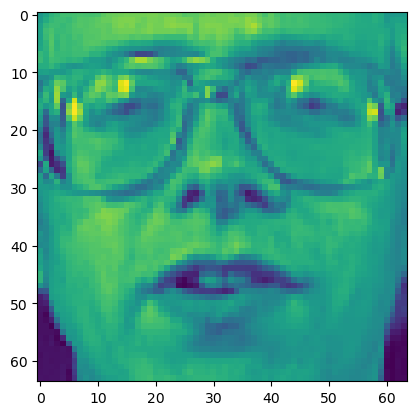

In [6]:
#what the reshaped image looks like
plt.imshow(X[10].reshape(64, 64))

In [8]:
#assign to image variable
image = X[10].reshape(64, 64)

[Back to top](#Index:) 

## Problem 1

### Scaling the Image

**2 Points**

Use the same strategy as the video to scale the `image` by subtracting the mean and dividing by the standard deviation.  Use `numpy` methods to find the `mean` and `std`.  Assign your results to `ans1` below.  Note that the image should look identical after the scaling.

[[0.5413223  0.58677685 0.6404959 ]
 [0.553719   0.61570245 0.6570248 ]
 [0.5785124  0.6528926  0.677686  ]]
[[-0.15727723  0.18584998  0.5913641 ]
 [-0.06369712  0.40420341  0.7161374 ]
 [ 0.12346309  0.6849442   0.8721044 ]]
<class 'numpy.ndarray'>


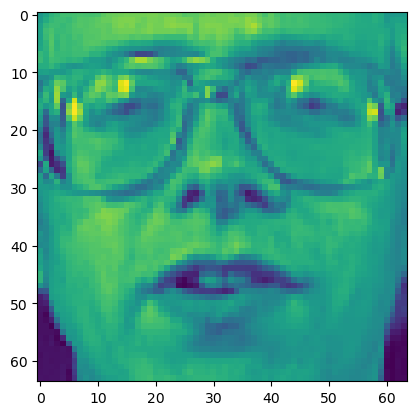

In [12]:
### GRADED

ans1 = None

# YOUR CODE HERE
ans1 = (image - image.mean())/image.std()

# Answer check
print(image[:3, :3])
print(ans1[:3, :3])
print(type(ans1))
plt.imshow(ans1)

[Back to top](#Index:) 

## Problem 2

### SVD of Scaled Image

**2 Points**

Below, use the `svd` `scipy` function to factor the scaled image.  Assign your factors to variables `U`, `sigma`, and `VT` respectively.  Remember to set the argument `full_matrices` equal to `False`. 

In [18]:
### GRADED

U, sigma, VT = None, None, None

# YOUR CODE HERE
U, sigma, VT = svd(ans1, full_matrices=False)

# Answer check
print(U.shape, sigma.shape, VT.shape)
print(type(U))
print(sigma)

(64, 64) (64,) (64, 64)
<class 'numpy.ndarray'>
[3.6854450e+01 3.0636703e+01 2.4717415e+01 1.7025511e+01 1.3597555e+01
 1.1499007e+01 1.0119406e+01 8.8010912e+00 8.2029381e+00 7.8590908e+00
 7.5549378e+00 6.3242898e+00 5.4838157e+00 4.9500136e+00 4.3680229e+00
 3.8988369e+00 3.5883257e+00 3.4401274e+00 3.0895100e+00 2.8186336e+00
 2.7223523e+00 2.4406757e+00 2.2754359e+00 2.0123034e+00 1.8202577e+00
 1.6502718e+00 1.5928756e+00 1.4366162e+00 1.2949604e+00 1.1682940e+00
 1.0943987e+00 1.0258733e+00 9.3521643e-01 8.9721143e-01 7.7925622e-01
 7.0012695e-01 6.7087394e-01 6.5199655e-01 5.4073781e-01 5.3727496e-01
 4.8825705e-01 4.1768876e-01 3.8780826e-01 3.8620362e-01 3.5230732e-01
 3.1418669e-01 3.0637050e-01 2.7412254e-01 2.4864921e-01 2.3503368e-01
 2.1368800e-01 1.7815678e-01 1.5846644e-01 1.4138171e-01 1.3617434e-01
 1.1609502e-01 9.2403531e-02 7.7139713e-02 6.8871289e-02 5.2680980e-02
 3.5947282e-02 2.6606267e-02 7.9659550e-03 3.1714537e-03]


[Back to top](#Index:) 

## Problem 3

### Converting $\Sigma$

**2 Points**

As noted, `scipy` returns a single dimension vector that is the main diagonal of $\Sigma$. 

Use the `np.diag` function with argument `sigma` to create a diagonal matrix with the singular values as the main diagonal.  Assign your answer to the variable `Sigma` below.

In [20]:
### GRADED

Sigma = None

# YOUR CODE HERE
Sigma = np.diag(sigma)

# Answer check
print(Sigma.shape)
print(type(Sigma))
print(Sigma)

(64, 64)
<class 'numpy.ndarray'>
[[3.6854450e+01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 3.0636703e+01 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 2.4717415e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.6606267e-02
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  7.9659550e-03 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 3.1714537e-03]]


[Back to top](#Index:) 

## Problem 4

### Reconstructing the Image

**2 Points**

Using the decomposed elements `U` and `VT` and the updated `Sigma` array, multiply the factored elements together using the `@` operator to reconstruct the original image.  Assign your results to `ans4` below. Note that the reconstructed image should look like the original image.

(64, 64)
<class 'numpy.ndarray'>


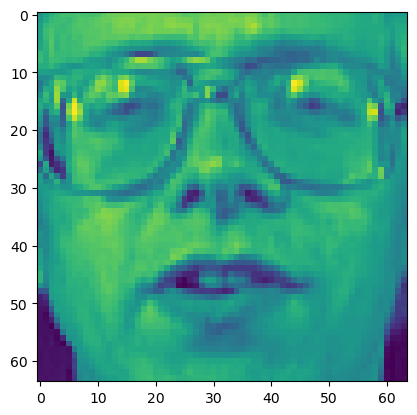

In [22]:
### GRADED

ans4 = None

# YOUR CODE HERE
ans4 = U @ Sigma @ VT

# Answer check
print(ans4.shape)
print(type(ans4))
plt.imshow(ans4)

[Back to top](#Index:) 

## Problem 5

### Examining Singular Values

**2 Points**

Extract the first ten singular values (first two rows and columns) of `Sigma`.  Assign these to the variable `top_10` below.  

Standardize the singular values stored in `top_10`  by dividing each by the sum of the main diagonal (`Sigma.sum()`).  Assign the result to `ans5` below.  

(2, 2)
<class 'numpy.ndarray'>


<Axes: >

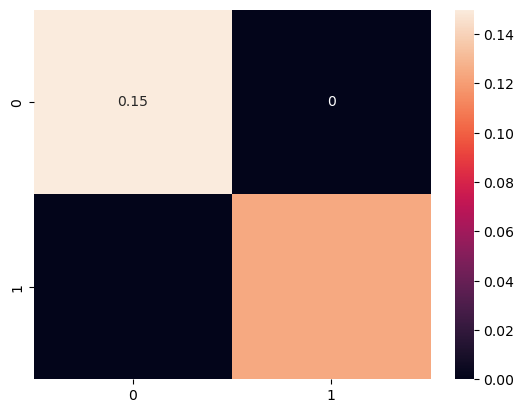

In [24]:
### GRADED

top_10 = None
ans5 = None

# YOUR CODE HERE
top_10 = Sigma[:10, :10]
ans5 = top_10 / Sigma.sum()

# Answer check
print(top_10.shape)
print(type(ans5))
sns.heatmap(ans5, annot = True)